# Prediction of Student grade percentage based on the number of hours studied. 

This code is prepared by Mohammed Osama Abuelwafa as part of the TSF Data science and business analytics internship. It is a beginner task in order to warm up. 

## Importing the necessary libraries


In [56]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

## Descriptive Analytics

### Loading the Data set and performing initial EDA

In [3]:
students_df = pd.read_csv("D:\AUC\The spark foundation\Task 1\spark files\student_scores - student_scores.csv")

In [4]:
students_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# generating some summary statistics regarding the data 
students_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
students_df.isna().sum()

Hours     0
Scores    0
dtype: int64

**As we can notice, the data is clean. No preprocessing is needed nor feature engineering since the problem is relatively simple**

### visualizing the data

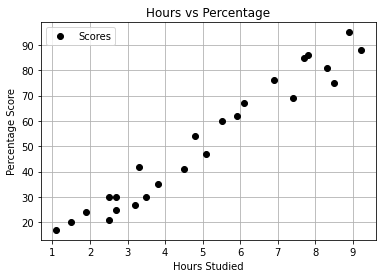

In [16]:
students_df.plot(x='Hours', y='Scores', style='ko')  
plt.title('Hours vs Percentage')  
plt.grid(visible=True)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The relation can be noticed to be linear within two variables. hence, a simple linear regression model will perform well without overfitting or underfitting. Let's test this hypothesis.  

## Predictive Analytics

In [36]:
# creating the features and target variables
Hours = students_df.iloc[: , :-1]
scores = students_df.iloc[: , 1]


In [37]:
# creating the training and validation datasets
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(Hours, scores, 
                            test_size=0.2, random_state=20)

In [38]:
# Training the linear regression model 
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

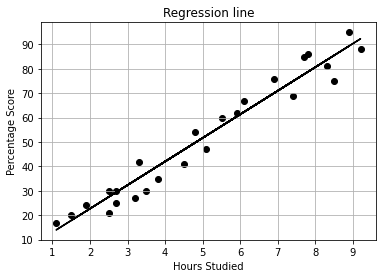

In [45]:
# plotting the regression line 
reg_line = reg.coef_*Hours+reg.intercept_

# Plotting for the test data
plt.title('Regression line')  
plt.scatter(Hours, scores , c='k')
plt.plot(Hours, reg_line , c='k' );
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid(visible=True)
plt.show()

### Making Predictions on the test data

In [46]:
y_pred = reg.predict(x_test)

In [47]:
results_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
results_df

,Actual,Predicted
19,69,74.909597
23,76,70.074059
12,41,46.863479
4,30,37.192404
18,67,62.337199


In [55]:
#testing with our own data as in the prompt 
hours_sample = [[9.25]]
sample_pred = reg.predict(hours_sample)
print(f"No of Hours = {hours_sample[0][0]}")
print(f"Predicted Score = {sample_pred[0]}")

No of Hours = 9.25
Predicted Score = 92.80108554200021


### Evaluating the model 


In [48]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.91084430646127


### Experimenting with an XGBOOST model to solve the regression model to discuss the tradeoffs

In [57]:
xgBoost = GradientBoostingRegressor(random_state=0)
xgBoost.fit(Hours,scores)

GradientBoostingRegressor(random_state=0)

In [58]:
# model evaluation 
xgBoost.score(Hours,scores)

0.9964832741452143

The prediction accuracy is around 99.6%. Are we overfitting?

In [59]:
xg_pred = xgBoost.predict(x_test)

In [60]:
xg_df= pd.DataFrame({'Actual': y_test, 'Predicted': xg_pred}) 

In [61]:
xg_df

,Actual,Predicted
19,69,69.262790
23,76,75.679220
12,41,40.960720
4,30,30.413886
18,67,66.986002


In [62]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, xg_pred)) 

Mean Absolute Error: 0.21014665269571609


As expected, the xgboost model performs really better than the linear regression model. However, due to data scarcity, we can notice the overfitting effect. hence, it is better to use the linear regression for generalization purposes and reducing the variance. 

In [63]:
#testing with our own data as in the prompt 
hours_sample = [[9.25]]
xgSample_pred = xgBoost.predict(hours_sample)
print(f"No of Hours = {hours_sample[0][0]}")
print(f"Predicted Score = {xgSample_pred[0]}")

No of Hours = 9.25
Predicted Score = 88.1016478513951


The score is not as accurate when new data is presented